# Text Mining Analysis

In [1]:
import pandas as pd
import numpy as np
import nltk
import os
import nltk.corpus
from nltk import word_tokenize,sent_tokenize
from nltk.tokenize import word_tokenize

In [2]:
# Execute only if the components are missing
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Antonio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Antonio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Antonio\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Antonio\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
current_path = os.getcwd()

In [3]:
data_set = pd.read_csv(current_path+"\\Dataset\\next_generation_patents.csv", low_memory=False)

In [4]:
data_set.head()

,Publication_Number,Title,Abstract,Classification,Main_Class,Main_Subclass
0,US20120178627A1,Increased tolerance of dht-enabled plants to a...,The present invention relates to a method of c...,"['A01N39/04', 'A01N39/00', 'A01N39/02']",A01,A01N
1,WO2012120105A1,Use of lipochito-oligosaccharide compounds for...,The present invention relates to the use of li...,"['A01N43/16', 'A01N43/00', 'A01N43/14', 'A01N4...",A01,A01N
2,WO2012126938A2,Active compound combinations \r\n,The present invention relates to active compou...,"['A01N43/40', 'Y02A90/22', 'A01N43/34', 'A01N3...",A01,A01N
3,WO2012136581A1,Fungicide hydroximoyl-tetrazole derivatives \r...,The present invention relates to hydroximoyl-t...,"['A01N43/74', 'C07D405/00', 'C07D417/14', 'C07...",C07,C07D
4,WO2012156400A1,Insecticidal compounds based on arylthioacetam...,The present invention provides compounds of fo...,"['A01N43/74', 'C07D405/00', 'C07D413/02', 'A01...",C07,C07D


#### TITLE & ABSTRACT

In [5]:
ff = data_set[['Title','Abstract']]
text = ""
for i in range(0,len(ff.Title)):
    if not pd.isna(ff.at[i,'Abstract']):
        text = text + ff.at[i,'Title'].split("\r", 1)[0]
        text = text + ff.at[i,'Abstract'][:-4] + " "

In [6]:
text = text.replace("\r","")
text = text.replace("\n","")
text = text.replace(",","")
text = text.replace(";","")
text = text.replace(":","")
text = text.replace(".","")
text = text.replace("(","")
text = text.replace(")","")
text = text.replace("#","")
text = text.replace("The","")
text = text.replace("wherein","")
text = text.replace("I","")


In [7]:
tokens = nltk.word_tokenize(text)

In [8]:
#STOP WORDS
from nltk import word_tokenize
from nltk.corpus import stopwords
a = set(stopwords.words('english'))
tokens = [x for x in tokens if x not in a]

In [9]:
# SOFT STEMMING
from nltk.stem import PorterStemmer
pst = PorterStemmer()
stemmed_words = []
for word in tokens:
    stemmed_words.append(pst.stem(word))

In [10]:
#LEMMATIZE
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 
lemmatized_words = []
for word in stemmed_words:
    lemmatized_words.append(lemmatizer.lemmatize(word))

In [11]:
#Create your trigrams
tgs = nltk.trigrams(tokens)
occurences = []
#compute frequency distribution for all the trigrams in the text
fdist_triple = nltk.FreqDist(tgs)
fdist_triple = fdist_triple.most_common(len(fdist_triple))
for k,v in fdist_triple:
    if v == 1:
        break    
    print (k,v)
    occurences.append(v)

('present', 'invention', 'relates') 226
('aerosol', 'delivery', 'device') 158
('aerosol', 'precursor', 'composition') 89
('wireless', 'power', 'transmission') 66
('defined', 'claim', '1') 54
('comprising', 'least', 'one') 53
('wireless', 'power', 'network') 51
('Data', 'processing', 'systems') 50
('invention', 'relates', 'novel') 49
('selected', 'group', 'consisting') 43
('least', 'one', 'receiver') 43
('data', 'subject', 'access') 43
('During', 'operation', 'system') 42
('least', 'one', 'compound') 41
('present', 'invention', 'provides') 40
('present', 'disclosure', 'relates') 39
('wireless', 'power', 'transmitter') 39
('derivatives', 'Compounds', 'formula') 39
('power', 'network', 'may') 38
('»', 'ç', '»') 38
('substituents', 'defined', 'claim') 38
('useful', 'pesticides', 'especially') 38
('invention', 'relates', 'use') 37
('invention', 'also', 'relates') 37
('biological', 'control', 'agent') 37
('wireless', 'power', 'manager') 37
('power', 'manager', 'application') 37
('claim', '1'

('bicyclische', 'heterocyclen-derivate', 'als') 9
('haben', 'deren', 'Anwendung') 9
('agrochemische', 'Formulierungen', 'enthaltend') 9
('Formulierungen', 'enthaltend', 'die') 9
('enthaltend', 'die', 'Verbindungen') 9
('die', 'Verbindungen', 'gemÃ¤Ã\x9f') 9
('Verbindungen', 'gemÃ¤Ã\x9f', 'Formel') 9
('This', 'invention', 'relates') 9
('undesired', 'phytopathogenic', 'microorganisms') 9
('reservoir', 'configured', 'retain') 9
('provided', 'aerosol', 'delivery') 9
('controllable', 'activate', 'vaporize') 9
('Ð¿Ð¾Ð', '»', 'Ñ\x8cÐ·Ð¾Ð²Ð°Ñ\x82ÐµÐ') 9
('»', 'Ñ\x8cÐ·Ð¾Ð²Ð°Ñ\x82ÐµÐ', '»') 9
('use', 'controlling', 'phytopathogenic') 9
('least', 'one', 'active') 9
('one', 'active', 'compound') 9
('embodiments', 'system', 'configured') 9
('producing', 'using', 'polypeptide') 9
('polynucleotides', 'encoding', 'present') 9
('encoding', 'present', 'invention') 9
('power', 'source', 'element') 9
('relates', 'method', 'controlling') 8
('relates', 'active', 'compound') 8
('relates', 'method', 'curative

('configured', 'direct', 'power') 6
('reservoir', '218', 'configured') 6
('218', 'configured', 'retain') 6
('load', 'includes', 'heating') 6
('power', 'source', 'heating') 6
('delivery', 'devices', 'methods') 6
('methods', 'forming', 'devices') 6
('forming', 'devices', 'elements') 6
('elements', 'devices', 'n') 6
('devices', 'n', 'embodiments') 6
('resource', 'request', 'result') 6
('embodiment', 'method', 'includes') 6
('fraudulent', 'bill', 'payment') 6
('securely', 'stored', 'data') 6
('encoding', 'compositions', 'methods') 6
('compositions', 'methods', 'related') 6
('methods', 'related', 'production') 6
('thereof', 'including', 'one') 6
('compared', 'one', 'reference') 6
('one', 'reference', 'subtilisi') 6
('composition', 'A', 'neutral') 6
('A', 'neutral', 'acidic') 6
('cellulase', 'variants', 'active') 6
('variants', 'active', 'fragments') 6
('active', 'fragments', 'thereof') 6
('nucleic', 'acids', 'encoding') 6
('detersive', 'surfactant', 'Laundry') 6
('surfactant', 'Laundry', 'd

('actually', 'improve', 'nutritional') 4
('improve', 'nutritional', 'substance') 4
('nutritional', 'substance', 'attribute') 4
('living', 'identification', 'associated') 4
('identification', 'associated', 'particular') 4
('candidate', 'ingestible', 'products') 4
('via', 'electronically', 'enabled') 4
('electronically', 'enabled', 'input') 4
('enabled', 'input', 'response') 4
('least', 'one', 'authorized') 4
('one', 'authorized', 'entity') 4
('least', 'one', 'occurrence') 4
('one', 'occurrence', 'least') 4
('occurrence', 'least', 'partial') 4
('partial', 'preparation', 'particular') 4
('preparation', 'particular', 'ingestible') 4
('particular', 'ingestible', 'product') 4
('identification', 'particular', 'individual') 4
('individual', 'living', 'n') 4
('living', 'n', 'addition') 4
('previous', 'time', 'period') 4
('display', 'field', 'view') 4
('method', 'computer', 'program') 4
('computer', 'program', 'product') 4
('least', 'partial', 'treatment') 4
('partial', 'treatment', 'one') 4
('t

('bacteria', 'fungi', 'yeasts') 3
('plant', 'parts', 'well') 3
('parts', 'well', 'losses') 3
('well', 'losses', 'harvested') 3
('losses', 'harvested', 'fruits') 3
('fruits', 'vegetables', 'caused') 3
('vegetables', 'caused', 'insects') 3
('resistant', 'herbicide', 'tolerant') 3
('agriculturally', 'acceptable', 'salts') 3
('group', 'P', 'L') 3
('methylene', 'ethylene', 'one') 3
('ethylene', 'one', 'A1') 3
('A1', 'A2', 'S') 3
('A2', 'S', 'SO') 3
('hydrogen', 'methyl', 'R4') 3
('methyl', 'R4', 'independently') 3
('independently', 'hydrogen', 'methyl') 3
('hydrogen', 'methyl', 'Y1') 3
('nitrogen', 'R5', 'hydrogen') 3
('R5', 'hydrogen', 'halogen') 3
('hydrogen', 'halogen', 'cyano') 3
('cyano', 'nitro', 'NH2') 3
('bridge', 'X2', 'C-X6') 3
('X4', 'trifluoromethyl', 'difluoromethyl') 3
('trifluoromethyl', 'difluoromethyl', 'chlorodifluoromethyl') 3
('difluoromethyl', 'chlorodifluoromethyl', 'invention') 3
('chlorodifluoromethyl', 'invention', 'also') 3
('also', 'provides', 'intermediates') 3
(

('dynamic', 'multi-parameter', 'predictive') 3
('multi-parameter', 'predictive', 'modeling') 3
('recurring', 'time', 'intervals') 3
('time', 'intervals', 'time') 3
('intervals', 'time', 'map') 3
('time-based', 'activity', 'pattern') 3
('biometric', 'data', 'user') 3
('access', 'securely', 'stored') 3
('portions', 'financial', 'report') 3
('produce', 'total', 'risk') 3
('risk', 'factor', 'present') 3
('automatic', 'dishwashing', 'cleaning') 3
('well', 'variety', 'industrial') 3
('001', '%', '5') 3
('%', '5', '%') 3
('cleaning', 'agent', 'selected') 3
('group', 'consisting', 'cleaning') 3
('consisting', 'cleaning', 'surfactants') 3
('cleaning', 'surfactants', 'soil') 3
('surfactants', 'soil', 'suspending') 3
('soil', 'suspending', 'polymers') 3
('suspending', 'polymers', 'mixtures') 3
('polymers', 'mixtures', 'thereof') 3
('compound', 'selected', 'group') 3
('detergent', 'composition', 'An') 3
('composition', 'An', 'automatic') 3
('An', 'automatic', 'dishwashing') 3
('5', '75', 'composit

('agrochemical', 'mixtures', 'compositions') 3
('compositions', 'comprising', 'nitrification') 3
('comprising', 'nitrification', 'inhibitors') 3
('inhibitors', 'formula', 'Use') 3
('related', 'metabolic', 'pathways') 3
('fungicides', 'insecticides', 'acaricides') 2
('compound', 'combinations', 'present') 2
('combinations', 'present', 'invention') 2
('nsecticidal', 'compounds', 'based') 2
('compounds', 'based', 'arylthioacetamide') 2
('based', 'arylthioacetamide', 'derivatives') 2
('arylthioacetamide', 'derivatives', 'present') 2
('R3', 'R4', 'G1') 2
('R4', 'G1', 'n') 2
('G1', 'n', 'A1') 2
('n', 'A1', 'A2') 2
('A4', 'independently', 'one') 2
('one', 'another', 'C-H') 2
('R3', 'C1-C8haloalkyl', 'R4') 2
('C1-C8haloalkyl', 'R4', 'aryl') 2
('Y3', 'Y4', 'independently') 2
('R6', 'R7', 'R8') 2
('R9', 'defined', 'claims') 2
('protozoas', 'viruses', 'entomopathogenic') 2
('nsect', 'resistant', 'herbicide') 2
('breeding', 'stack', 'soybean') 2
('stack', 'soybean', 'event') 2
('event', 'pDAB95828

('least', 'one', 'region') 2
('sample', 'agricultural', 'product') 2
('Sensor-synchronized', 'spectrally-structured-light', 'imaging') 2
('spectrally-structured-light', 'imaging', 'A') 2
('imaging', 'A', 'smartphone') 2
('A', 'smartphone', 'adapted') 2
('smartphone', 'adapted', 'use') 2
('adapted', 'use', 'imaging') 2
('use', 'imaging', 'spectrometer') 2
('imaging', 'spectrometer', 'synchronized') 2
('spectrometer', 'synchronized', 'pulsing') 2
('synchronized', 'pulsing', 'different') 2
('pulsing', 'different', 'LED') 2
('different', 'LED', 'light') 2
('LED', 'light', 'sources') 2
('light', 'sources', 'different') 2
('sources', 'different', 'image') 2
('different', 'image', 'frames') 2
('image', 'frames', 'captured') 2
('frames', 'captured', 'phone') 2
('captured', 'phone', "'s") 2
('phone', "'s", 'CMOS') 2
("'s", 'CMOS', 'image') 2
('CMOS', 'image', 'sensor') 2
('image', 'sensor', 'A') 2
('sensor', 'A', 'particular') 2
('A', 'particular', 'implementation') 2
('particular', 'implementa

('Upon', 'receiving', 'request') 2
('surface', 'information', 'mobile') 2
('augmented', 'reality', 'surface') 2
('reality', 'surface', 'information') 2
('device', 'AR', 'lift') 2
('systems', 'media', 'launching') 2
('media', 'launching', 'mobile') 2
('launching', 'mobile', 'application') 2
('mobile', 'application', 'using') 2
('application', 'using', 'public') 2
('display', 'device', 'Methods') 2
('device', 'Methods', 'systems') 2
('device', 'provided', 'n') 2
('presenting', 'content', 'public') 2
('method', 'comprising', 'initiating') 2
('user', 'device', 'communication') 2
('selecting', 'display', 'device') 2
('prominently', 'using', 'touchscreen') 2
('using', 'touchscreen', 'receiving') 2
('user', 'interface', 'via') 2
('updated', 'user', 'interface') 2
('target', 'environment', 'data') 2
('systems', 'media', 'controlling') 2
('media', 'controlling', 'information') 2
('area', 'screen', 'allocated') 2
('screen', 'allocated', 'use') 2
('allocated', 'use', 'user') 2
('use', 'user', 'de

('allowing', 'first', 'device') 2
('first', 'device', 'eg') 2
('device', 'eg', 'transmitter') 2
('eg', 'transmitter', 'adjust') 2
('transmitter', 'adjust', 'real') 2
('adjust', 'real', 'time') 2
('near-real', 'time', 'operational') 2
('time', 'operational', 'behavior') 2
('operational', 'behavior', 'first') 2
('behavior', 'first', 'device') 2
('first', 'device', "'s") 2
('device', "'s", 'hardware') 2
("'s", 'hardware', 'software') 2
('hardware', 'software', 'eg') 2
('software', 'eg', 'adjust') 2
('eg', 'adjust', 'power') 2
('adjust', 'power', 'waves') 2
('power', 'waves', 'based') 2
('waves', 'based', 'upon') 2
('based', 'upon', 'data') 2
('upon', 'data', 'samples') 2
('data', 'samples', 'eg') 2
('samples', 'eg', 'power') 2
('eg', 'power', 'values') 2
('power', 'values', 'received') 2
('values', 'received', 'second') 2
('second', 'device', 'eg') 2
('device', 'eg', 'receiver') 2
('plurality', 'power', 'transfer') 2
('power', 'transmitter', 'receiver') 2
('transmission', 'system', 'An') 

('mapping', 'image', 'element') 2
('determining', 'geographic', 'region') 2
('performance', 'value', 'change') 2
('determining', 'national', 'crop') 2
('national', 'crop', 'yields') 2
('crop', 'yields', 'growing') 2
('yields', 'growing', 'season') 2
('computer', 'system', 'receives') 2
('time', 'agricultural', 'time') 2
('one', 'geo-specific', 'time') 2
('geo-specific', 'time', 'series') 2
('time', 'series', 'represent') 2
('one', 'aggregated', 'time') 2
('aggregated', 'time', 'series') 2
('crop', 'yield', 'estimating') 2
('yield', 'estimating', 'module') 2
('state', 'crop', 'yield') 2
('specific', 'year', 'using') 2
('nitrogen', 'availability', 'based') 2
('different', 'soil', 'layers') 2
('computing', 'system', 'may') 2
('nitrogen', 'availability', 'data') 2
('Described', 'herein', 'systems') 2
('one', 'processing', 'unit') 2
('configured', 'execute', 'instructions') 2
('automatically', 'determine', 'whether') 2
('whether', 'least', 'one') 2
('least', 'one', 'correlation') 2
('differ

('Landwirtschaft', 'sowie', 'von') 2
('sowie', 'von', 'Ektoparasiten') 2
('von', 'Ektoparasiten', 'der') 2
('Ektoparasiten', 'der', 'VeterinÃ¤rmedizi') 2
('4-substituted', 'phenylamidine', 'derivatives') 2
('phenylamidine', 'derivatives', 'general') 2
('Formel', 'welchen', 'Aa') 2
('2-hetaryl-substituierte', 'kondensierte', 'heterocyclen-derivate') 2
('kondensierte', 'heterocyclen-derivate', 'als') 2
('A1', 'A2', 'und') 2
('A2', 'und', 'n') 2
('gemÃ¤Ã\x9f', 'Formel', 'agrochemische') 2
('Formel', 'agrochemische', 'Formulierungen') 2
('Verbindung', 'der', 'Formel') 2
('von', 'tierischen', 'und') 2
('tierischen', 'und', 'mikrobiellen') 2
('ectoparasite-controlling', 'agent', 'animal') 2
('agent', 'animal', 'A') 2
('von', '2-', '[') 2
('body', '102', 'coupled') 2
('102', 'coupled', 'coupleable') 2
('cartridge', '104', 'equipped') 2
('104', 'equipped', 'heating') 2
('102', 'cartridge', '104') 2
('input', 'device', '248') 2
('including', 'capacitive', 'sensor') 2
('detect', 'user', 'input')

('provided', 'present', 'disclosure') 2
('encoding', 'CasY', 'guide') 2
('disclosure', 'provides', 'methods') 2
('use', 'genetically-modified', 'cells') 2
('cells', 'present', 'disclosure') 2
('co-', 'stimulatory', 'domains') 2
('genetically-', 'modified', 'cells') 2
('disclosed', 'herein', 'plasmids') 2
('herein', 'plasmids', 'viral') 2
('plasmids', 'viral', 'vectors') 2
('viral', 'vectors', 'comprising') 2
('vectors', 'comprising', 'nucleic') 2
('methods', 'administering', 'compositions') 2
('administering', 'compositions', 'comprising') 2
('subjects', 'order', 'reduce') 2
('order', 'reduce', 'symptoms') 2
('reduce', 'symptoms', 'progression') 2
('symptoms', 'progression', 'occurrence') 2
('progression', 'occurrence', 'disease') 2
('occurrence', 'disease', 'cance') 2
('Hpv-specific', 'binding', 'molecules') 2
('binding', 'molecules', 'Provided') 2
('molecules', 'Provided', 'binding') 2
('Provided', 'binding', 'molecules') 2
('binding', 'molecules', 'TCRs') 2
('molecules', 'TCRs', 'an

('ì\x98\x81ì\x83\x81ê°\x90ì\x8b\x9cë°©ë²\x95', 'ë°\x8f', 'ì\x9d´ë¥¼') 2
('ë°\x8f', 'ì\x9d´ë¥¼', 'ì\x9c\x84í\x95\x9c') 2
('ì\x9d´ë¥¼', 'ì\x9c\x84í\x95\x9c', 'ë\x8b¤ê¸°ë\x8a¥') 2
('ì\x9c\x84í\x95\x9c', 'ë\x8b¤ê¸°ë\x8a¥', 'ë\x93\x9cë¡') 2
('ë\x8b¤ê¸°ë\x8a¥', 'ë\x93\x9cë¡', 'ê³¼') 2
('ë\x93\x9cë¡', 'ê³¼', 'ì\x83\x81ê¸°') 2
('ê³¼', 'ì\x83\x81ê¸°', 'ë\x93\x9cë¡') 2
('ì\x83\x81ê¸°', 'ë\x93\x9cë¡', 'ì¶©ì') 2
('ì\x83\x81ê¸°', 'ì', '\x9cì\x96´ë¶\x80ë¡\x9c') 2
('ì', '\x9cì\x96´ë¶\x80ë¡\x9c', 'ì') 2
('ê²½ì\x9a°', 'ì\x83\x81ê¸°', 'ì') 2
('ì\x83\x81ê¸°', 'ì', '\x9cì\x96´ë¶\x80ì\x97\x90') 2
('ë³¸', 'ë°\x9cëª', 'ì\x9d\x98') 2
('fan', 'unmanned', 'aerial') 2
('tool', 'systems', 'unmanned') 2
('systems', 'unmanned', 'vehicles') 2
('system', 'universal', 'coupler') 2
('universal', 'coupler', 'configured') 2
('multiple', 'different', 'tool') 2
('different', 'tool', 'systems') 2
('Geographic', 'area', 'monitoring') 2
('area', 'monitoring', 'systems') 2
('monitoring', 'systems', 'methods') 2
('systems', 'pr

('true', 'random', 'sequence') 2
('one-time', 'pad', 'key') 2
('pad', 'key', 'Also') 2
('key', 'Also', 'disclosed') 2
('stream', 'measurement', 'data') 2
('computer', 'system', '20') 2
('set', 'project', 'requirements') 2
('project', 'device', 'may') 2
('whether', 'phase', 'project') 2
('receiving', 'one', 'computing') 2
('computing', 'devices', 'transaction') 2
('devices', 'transaction', 'request') 2
('forwarding', 'one', 'computing') 2
('ã\x83\x94ã\x83ªã\x83\x89ã\x83³å\x8c\x96å\x90\x88ç\x89©ã\x81\x8aã\x82\x88ã\x81³ã\x81\x9dã\x82\x8cã\x82\x92æ\x9c\x89å\x8a¹æ\x88\x90å\x88\x86ã\x81¨ã\x81\x99ã\x82\x8bè¾²å\x9c\x92è\x8a¸ç\x94¨æ®ºè\x8f\x8cå\x89¤', 'æ¤\x8dç\x89©ç\x97', 'å®³ã\x82\x92é\x98²é\x99¤ã\x81\x99ã\x82\x8bæ\x96°è¦\x8fã\x81ªå\x8c\x96å\x90\x88ç\x89©ã\x82\x92æ\x8f\x90ä¾\x9bã\x81\x99ã\x82\x8bã\x80\x82ã\x80\x80æ\x9c¬ç\x99ºæ\x98\x8eã\x81®ã\x83\x94ã\x83ªã\x83\x89ã\x83³å\x8c\x96å\x90\x88ç\x89©ã\x81¯æ\x96°è¦\x8fã\x81ªå\x8c\x96å\x90\x88ç\x89©ã\x81§ã\x81\x82ã\x82\x8aã\x80\x81æ¤\x8dç\x89©ç\x97') 2

In [12]:
occurences.sort()

In [13]:
s = pd.Series(occurences)

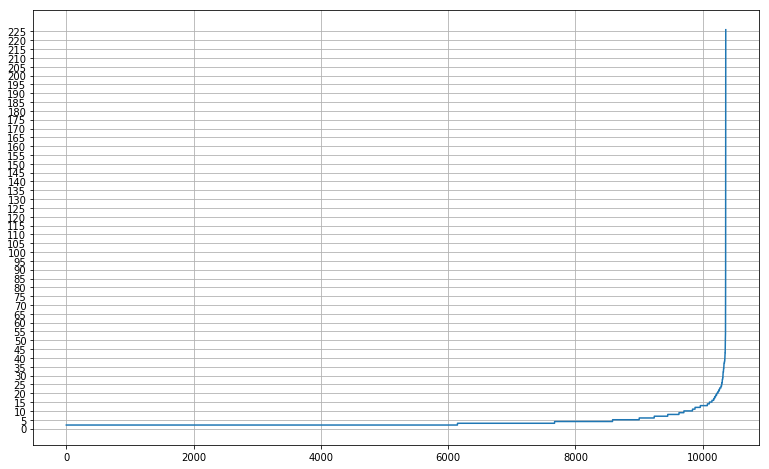

In [15]:
import matplotlib.pyplot as plt
plt.yticks(range(0,max(s),5))
s.plot(figsize=(13, 8))
plt.grid()

In [16]:
threshold = 19
f = open(current_path + "\\OutputFiles\\List of trigrams.txt", "w")

for k,v in fdist_triple:
    if v == threshold:
        break    
    line = str(k) + " " + str(v)
    f.write(line +'\n')    
f.close()